In [1]:
# imports
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# time series data
time_series_url = "https://api.covid19india.org/data.json"
time_response = requests.get(time_series_url)
time_data = json.loads(time_response.text)
time_data_array = time_data["cases_time_series"][-20:]

In [3]:
time_data_array

[{'dailyconfirmed': '96787',
  'dailydeceased': '1175',
  'dailyrecovered': '87788',
  'date': '17 September ',
  'totalconfirmed': '5212692',
  'totaldeceased': '83820',
  'totalrecovered': '4109826'},
 {'dailyconfirmed': '92973',
  'dailydeceased': '1221',
  'dailyrecovered': '95515',
  'date': '18 September ',
  'totalconfirmed': '5305665',
  'totaldeceased': '85041',
  'totalrecovered': '4205341'},
 {'dailyconfirmed': '92574',
  'dailydeceased': '1149',
  'dailyrecovered': '94389',
  'date': '19 September ',
  'totalconfirmed': '5398239',
  'totaldeceased': '86190',
  'totalrecovered': '4299730'},
 {'dailyconfirmed': '87395',
  'dailydeceased': '1135',
  'dailyrecovered': '92926',
  'date': '20 September ',
  'totalconfirmed': '5485634',
  'totaldeceased': '87325',
  'totalrecovered': '4392656'},
 {'dailyconfirmed': '74493',
  'dailydeceased': '1056',
  'dailyrecovered': '102070',
  'date': '21 September ',
  'totalconfirmed': '5560127',
  'totaldeceased': '88381',
  'totalrecovere

In [4]:
confirm = []
deceased = []
recovered = []
date = []

for data in time_data_array:
    confirm.append(int(data["dailyconfirmed"]))
    deceased.append(int(data["dailydeceased"]))
    recovered.append(int(data["dailyrecovered"]))
    date.append(data["date"])

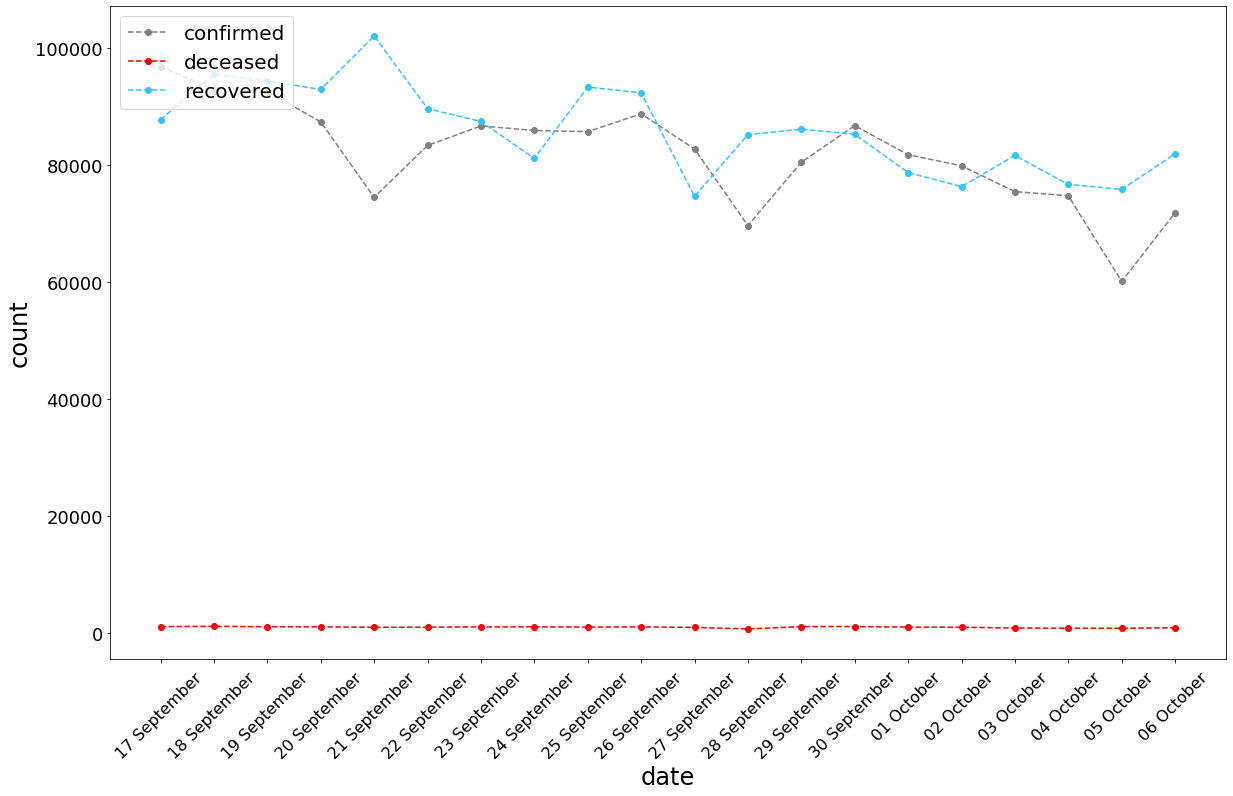

In [5]:
plt.figure(figsize=(20,12))

plt.plot(date,confirm,label="confirmed", linestyle="--", marker='o',color="grey")
plt.plot(date,deceased,label="deceased",linestyle="--", marker='o',color="red")
plt.plot(date,recovered,label="recovered",linestyle="--", marker='o',color="#33C4FF")
plt.xlabel("date",fontsize=24)
plt.ylabel("count",fontsize=24)
plt.legend(prop={'size': 20},loc="upper left")
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=18)
plt.show()

In [16]:
# cases distribution data
state_level_url = "https://api.covid19india.org/v4/data.json"

In [17]:
state_level_response = requests.get(state_level_url)

In [19]:
state_level_data = json.loads(state_level_response.text)

In [20]:
state_name = []
state_confirmed = []
state_deceased = []
state_recovered = []
state_tested = []


In [21]:
for state in state_level_data:
    if state != "TT":
        state_name.append(state)
        state_confirmed.append(state_level_data[state]['total']['confirmed'])
        try:
            state_deceased.append(state_level_data[state]['total']['deceased'])
        except:
            state_deceased.append(0)
        state_recovered.append(state_level_data[state]['total']['recovered'])
        state_tested.append(state_level_data[state]['total']['tested'])

In [22]:
state_dict = {"state":state_name,"confirmed":state_confirmed,"recovered":state_recovered,"deceased":state_deceased,"tested":state_tested}

In [23]:
state_df = pd.DataFrame(state_dict)

In [24]:
state_df["under_treatment"] =  state_df["confirmed"] - (state_df["recovered"] + state_df["deceased"])

In [25]:
state_df

,state,confirmed,recovered,deceased,tested,under_treatment
0,AN,3912,3678,54,63009,180
1,AP,729307,672479,6052,6216240,50776
2,AR,11007,7965,20,263242,3022
3,AS,188902,155074,778,3705740,33050
4,BR,190123,177929,925,7893739,11269
5,CH,12707,11035,180,82586,1492
6,CT,128893,100551,1104,1212678,27238
7,DL,295236,266935,5581,3370968,22720
8,DN,3101,2968,2,65539,131
9,GA,36238,31050,468,264139,4720


In [26]:
total = state_df[["recovered","deceased","under_treatment"]].sum()

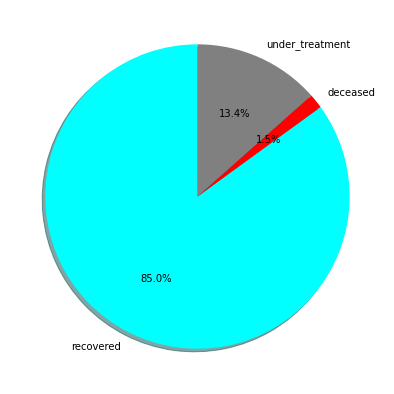

In [38]:
plt.figure(figsize=(7,7))
plt.pie(total.values, labels=total.index, autopct="%1.1f%%",shadow=True,startangle=90,colors=["cyan","red","grey"])
plt.show()